# Regenerar Information Value

En esta notebook vamos a regenerar el listado con information value...

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import pandas as pd

entire_df = pd.read_csv("data/cantidades_totales.csv", index_col=0)

df = entire_df
#df = df[(df.cantPalabra > 20) & (df.cantUsuariosTotal > 2)].copy() 

Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: File b'data/cantidades_totales.csv' does not exist

In [2]:
import re

cant_palabras = [c for c in df.columns if re.match(r'.*Palabras$', c)]
cant_personas = [c for c in df.columns if re.match(r'.*Usuarios$', c)]

df
df["cant_provincias"] = (df[cant_palabras] > 0).sum(axis=1)


In [3]:
from scipy.stats import entropy

df["entropy_palabras"] = df[cant_palabras].apply(entropy, axis=1, raw=True)
df["entropy_personas"] = df[cant_personas].apply(entropy, axis=1, raw=True)

df["delta_palabras"] = np.log(23) - df["entropy_palabras"]
df["delta_personas"] = np.log(23) - df["entropy_personas"]

In [4]:
df["log_cantidad"] = np.log(1+df.cantPalabra)
df["log_personas"] = np.log(1+df.cantUsuariosTotal)

df["norm_cantidad"] = df["log_cantidad"] / df["log_cantidad"].max()
df["norm_personas"] = df["log_personas"] / df["log_personas"].max()

In [5]:
df["ival_palabras"] = df.norm_cantidad * df.delta_palabras
df["ival_personas"] = df.norm_personas * df.delta_personas


df["ival"] = df["ival_palabras"] * df["ival_personas"]

In [6]:
df.sort_values("ival", inplace=True, ascending=False)

df["rank"] = range(df.shape[0])

df.iloc[:10][["cantPalabra", "cantUsuariosTotal"]]

,cantPalabra,cantUsuariosTotal
chivilcoy,4074.0,469.0
ush,2137.0,465.0
oberá,4322.0,378.0
logroño,2592.0,132.0
breñas,2590.0,170.0
chivil,811.0,241.0
obera,2106.0,410.0
bragado,2805.0,294.0
tolhuin,777.0,268.0
blv,1227.0,174.0


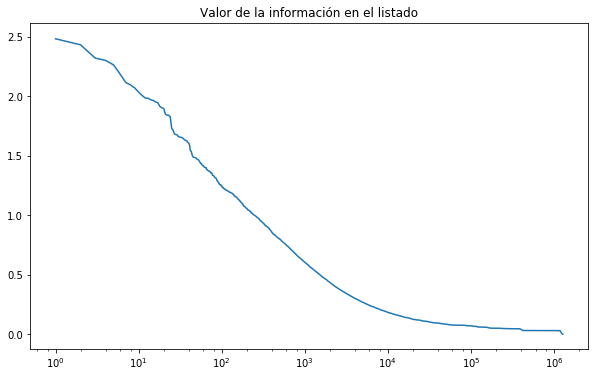

In [7]:
plt.rcParams["figure.figsize"] = (10, 6)
df.ival.plot();
plt.title(u"Valor de la información en el listado")
plt.semilogx();

In [8]:
information_columns = [
    "delta_palabras", "delta_personas",
    "norm_cantidad", "norm_personas",
    "ival_personas", "ival_palabras", "ival",
]

df.iloc[:100][information_columns]

,delta_palabras,delta_personas,norm_cantidad,norm_personas,ival_personas,ival_palabras,ival
chivilcoy,2.985391,2.577333,0.525064,0.616869,1.589877,1.567522,2.492167
ush,3.001104,2.772792,0.484323,0.616012,1.708073,1.453504,2.482692
oberá,3.011008,2.565838,0.528796,0.595294,1.527427,1.592209,2.431983
logroño,3.128658,3.046476,0.496510,0.490303,1.493697,1.553411,2.320326
breñas,3.097253,2.903091,0.496462,0.515500,1.496543,1.537667,2.301185
chivil,3.126003,3.108595,0.423172,0.550317,1.710714,1.322836,2.262994
obera,2.890104,2.591617,0.483401,0.603420,1.563834,1.397078,2.184798
bragado,2.939939,2.516360,0.501497,0.570172,1.434759,1.474370,2.115366
tolhuin,3.028762,2.932196,0.420470,0.560922,1.644734,1.273503,2.094574
blv,3.078704,2.888536,0.449299,0.517818,1.495736,1.383259,2.068991


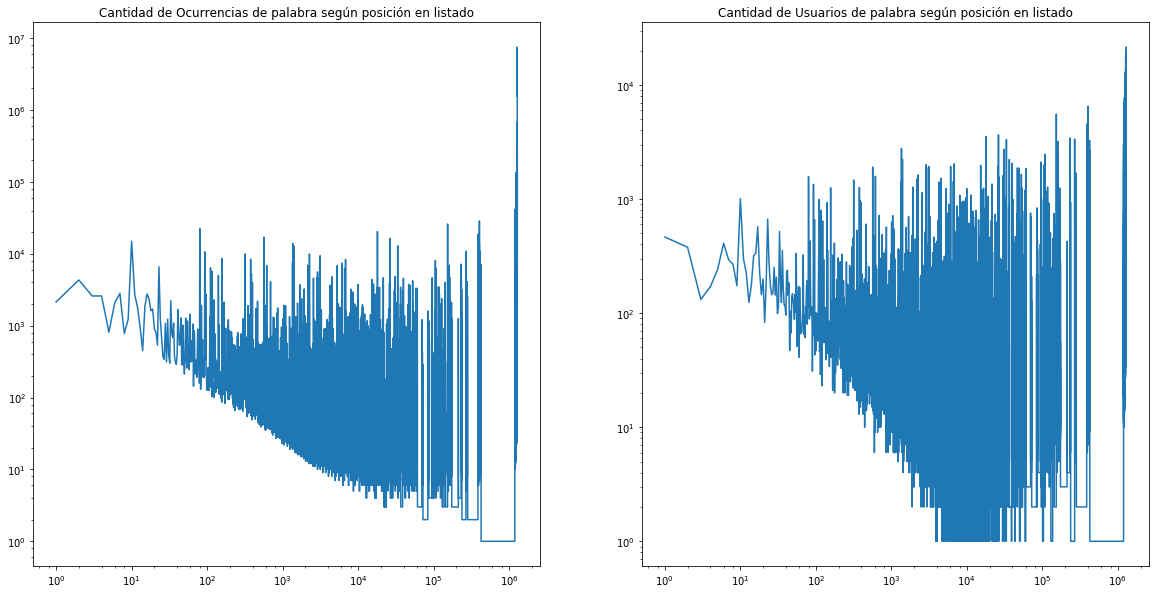

In [9]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.subplot(1, 2, 1)
df.cantPalabra.plot()


plt.semilogx();
plt.semilogy();
plt.title(u"Cantidad de Ocurrencias de palabra según posición en listado");

plt.subplot(1, 2, 2)
df.cantUsuariosTotal.plot()

plt.semilogx();
plt.semilogy();
plt.title(u"Cantidad de Usuarios de palabra según posición en listado");

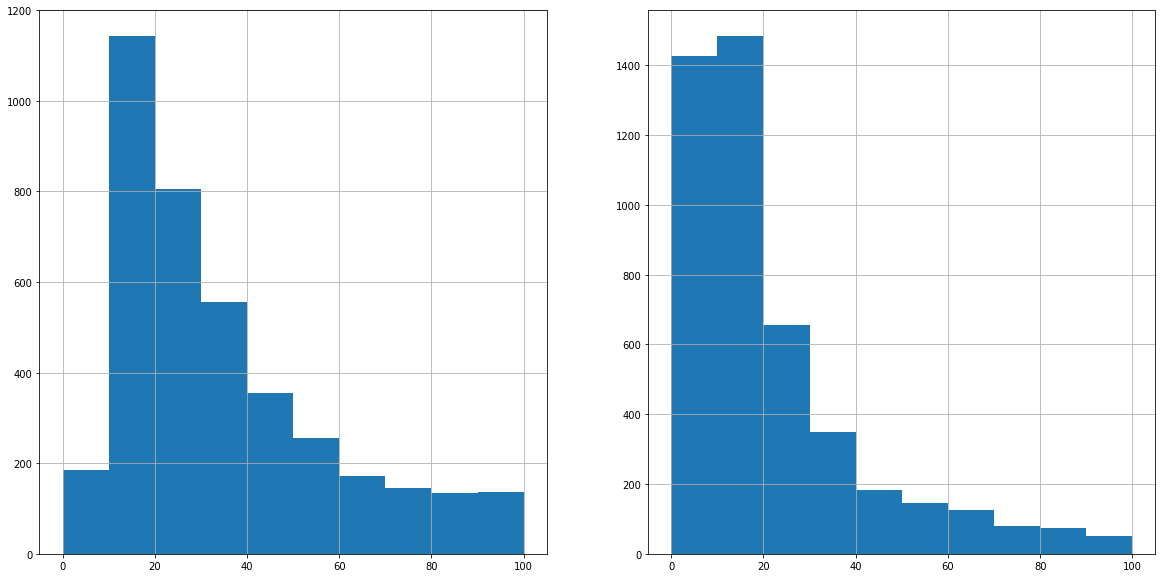

In [10]:
plt.subplot(1,2,1)
df.cantPalabra.iloc[:5000].hist(range=(0, 100))
plt.subplot(1,2,2)
df.cantUsuariosTotal.iloc[:5000].hist(range=(0, 100))


## ¿Y qué onda estas nuevas palabras? ¿Son muchas nuevas?

In [11]:
cincomil_nuevas = df.iloc[:5000].copy()

In [14]:
print("Diferencia = {}".format(len(diferencia)))

Diferencia = 2907


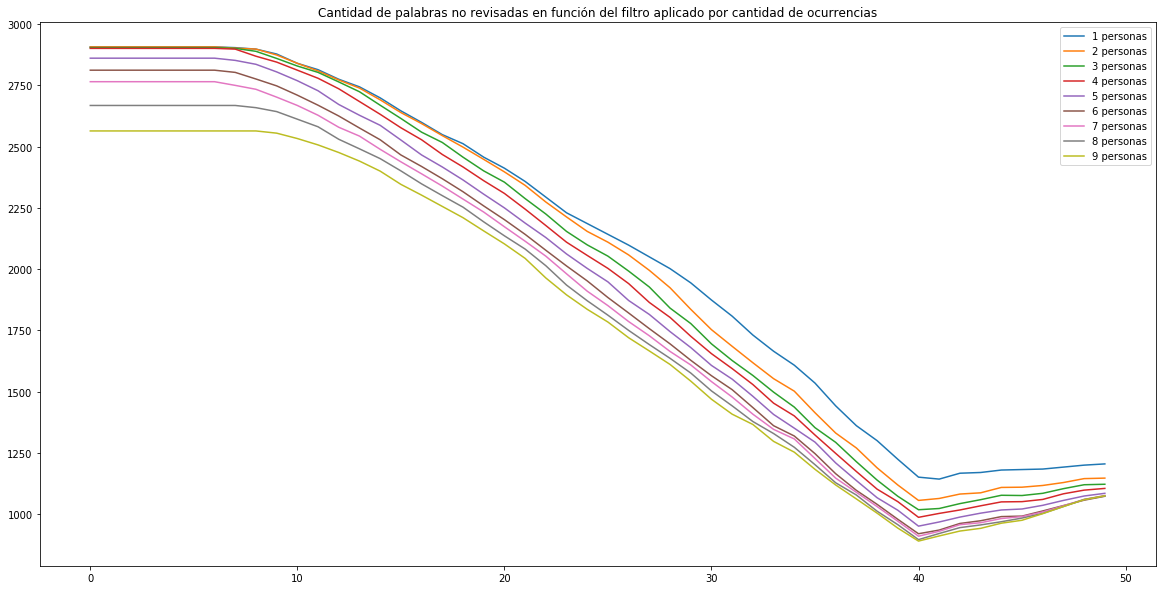

In [30]:
entire_df = pd.read_csv("csv/definito.csv", index_col=0)
palabras_analizadas = entire_df.iloc[:5000].index
handles = []

for minimo_personas in range(1, 10):
    filtros = range(0, 50)

    diferencias = []
    
    for filtro in filtros:
        cincomil_nuevas = df[(df.cantPalabra > filtro) & (df.cantUsuariosTotal >= minimo_personas)].iloc[:5000]
        diferencia = palabras_analizadas.difference(cincomil_nuevas.index)
        diferencias.append(len(diferencia))
    handle, = plot(filtros, diferencias, label="{} personas".format(minimo_personas))
    
    handles.append(handle)
    
legend(handles=handles)
title(u"Cantidad de palabras no revisadas en función del filtro aplicado por cantidad de ocurrencias")

Pareciera ser lo óptimo quedarnos con 40 ocurrencias como mínimo, y 2 o más personas. 